# Clasificacion de Imagenes Mediante Red Neural Convolucional

En el presente proyecto se busca crear un clasificador de imágenes que pueda detectar alguno de los siguientes tipos de cáncer a la piel mediante una red neural convolucional:

•	actinic keratosis
•	basal cell carcinoma
•	dermatofibroma
•	melanoma
•	nevus
•	pigmented benign keratosis-seborrheic keratosis
•	squamous cell carcinoma
•	vascular lesion

Este proyecto es importante debido a que existe un gran incremento de personas con cáncer a la piel en los últimos años. Un análisis referente del melanoma cutáneo de los datos de las Encuestas del Panel de Gastos Médicos indica que cada año se trata a 4.3 millones de adultos por cáncer de células basales y de células escamosas (espinocelular), a un costo de alrededor de cuatro mil ochocientos millones de dólares (Estadísticas del melanoma cutáneo | CDC, 2021).

El presente proyecto utiliza el siguiente proyecto como referencia base: https://www.tensorflow.org/tutorials/images/classification


#DATASET


Para poner en práctica un modelo es fundamental y determinante contar con data previamente segmentada en carpetas las cuales deben de contener las imágenes correspondientes a cada tipo de cáncer a la piel mencionado al principio. Para ello, se está utilizando Kaggle, la cual es una comunidad en línea de científicos de datos y profesionales del aprendizaje automático para la obtención de un DATASET. 


Se obtuvo el DATASET del siguiente link: https://www.kaggle.com/nodoubttome/skin-cancer9-classesisic



#Desarrollo

Para el desarrollo del proyecto utilizamos la convolución, la cual es una técnica de tratamiento de matrices que representan imágenes. Están representadas en los artículos académicos de forma esquemática, generalmente como capas en las redes neuronales de reconocimiento y clasificación de imágenes.

Las Redes neuronales convolucionales son un tipo de redes neuronales artificiales donde las «neuronas» corresponden a campos receptivos de una manera muy similar a las neuronas en la corteza visual primaria (V1) de un cerebro biológico.  Este tipo de red es una variación de un perceptrón multicapa, sin embargo, debido a que su aplicación es realizada en matrices bidimensionales, son muy efectivas para tareas de visión artificial, como en la clasificación y segmentación de imágenes, entre otras aplicaciones (Juan Barrios, 2022).


Importamos TensorFlow y otras librerías que nos ayudarán a conseguir el objetivo.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

Introducimos el suigente comando para poder obtener el DATASET descargado desde Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Clasificaremos imagenes de manchas las cuales indican que existe cancer. Estas se encuentran en la siguiente direccion:

In [3]:
import pathlib
data_dir = "/content/drive/MyDrive/Colab Notebooks/skinCancerISIC/Train"
data_dir = pathlib.Path(data_dir)


Los contenidos de este directorio son los siguientes:

In [4]:
os.listdir(data_dir)

['actinic keratosis',
 'nevus',
 'vascular lesion',
 'dermatofibroma',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'pigmented benign keratosis',
 'melanoma',
 'basal cell carcinoma']

Comprobamos que tenemos las imagenes:

In [5]:
contar_imagenes = len(list(data_dir.glob('*/*.jpg')))
print(f'Tenemos {contar_imagenes} en total.')

Tenemos 2239 en total.


In [6]:
melanoma = list(data_dir.glob('melanoma/*'))
PIL.Image.open(str(melanoma[125]))

Output hidden; open in https://colab.research.google.com to view.

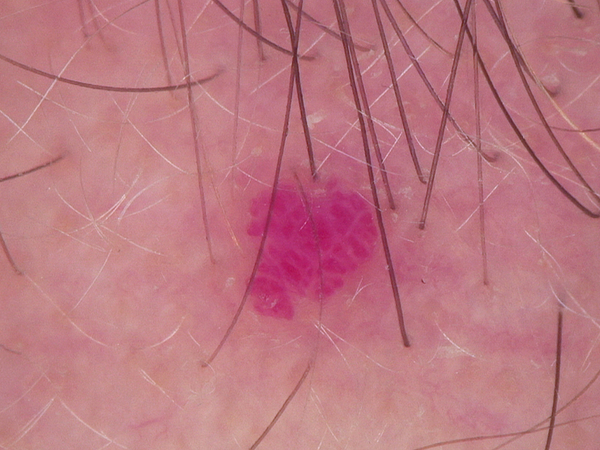

In [7]:
vascularLesion = list(data_dir.glob('vascular lesion/*'))
PIL.Image.open(str(vascularLesion[1]))

In [8]:
imagen = PIL.Image.open(str(vascularLesion[1]))

Revisamos el tamaño de una de nuestras imágenes

In [9]:
imagen.size

(600, 450)

Necesitamos generar un cargador, una utilidad que pase las imagenes a nuestro modelo de aprendizaje de forma automatica y organizada:

In [10]:
# Cuantas imagenes cargar en cada lote:
tamaño_lote = 70
# Las imagenes pueden ser de diferentes tamaños.
# Nuestros modelos generalmente solo podran trabajar
# con un tamaño de entrada de imagen. Forzamos a nuestro
# cargador a cargar las imagenes siempre en un mismo tamaño:
altura_img = 180
anchura_img = 180

Es una buena práctica usar una división de validación al desarrollar su modelo. Usemos el 80% de las imágenes para entrenamiento y el 20% para validación.

In [11]:
datos_entrenamiento = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(altura_img, anchura_img),
  batch_size=tamaño_lote)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [12]:
datos_validacion = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(altura_img, anchura_img),
  batch_size=tamaño_lote)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


Puede encontrar los nombres de clase en el atributo class_names en estos conjuntos de datos. Estos corresponden a los nombres de los directorios en orden alfabético.

In [13]:
nombre_clases = datos_entrenamiento.class_names
print(nombre_clases)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


Generamos una visualizacion para comprobar nuestras imagenes:

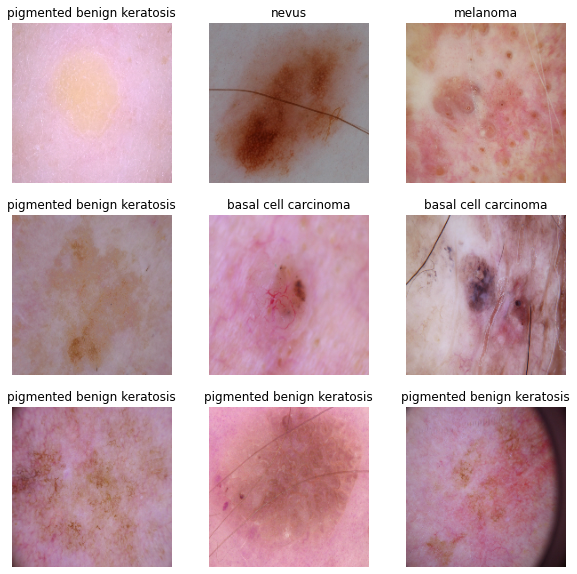

In [14]:
plt.figure(figsize=(10, 10))
for imagenes, etiqueta in datos_entrenamiento.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(imagenes[i].numpy().astype("uint8"))
    plt.title(nombre_clases[etiqueta[i]])
    plt.axis("off")

Entrenará un modelo usando estos conjuntos de datos pasándolos a Model.fit en un momento. Si lo desea, también puede iterar manualmente sobre el conjunto de datos y recuperar lotes de imágenes.Cada lote de imagenes esta representado por un tensor de tamaño 32x180x180x3. Numero de imagenes, altura de cada imagen, anchura de cada imagen y tres canales de color:

In [15]:
for lote_imagenes, lote_etiquetas in datos_entrenamiento:
  print(lote_imagenes.shape)
  print(lote_etiquetas.shape)
  break

(70, 180, 180, 3)
(70,)


El cargador de datos (dataloader) puede, entre otras capacidades, precargar los datos de disco en memoria para minimizar los bloqueos de lectura. Cache mantiene los datos de las imagenes en memoria despues de la primera pasada de entrenamiento (recordamos aqui el modelo de la neurona de regresion) y prefetch solapa el proceso de carga al proceso de entranimento para hacer un uso mas eficiente de memoria y procesador:

In [18]:
AUTOTUNE = tf.data.AUTOTUNE

datos_entrenamiento = datos_entrenamiento.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
datos_validacion = datos_validacion.cache().prefetch(buffer_size=AUTOTUNE)

# Estandarizacion de la Imagenes

Nuestras imagenes se representan como pixeles con valores entre 0 y 255. Estos numeros no son los ideales para una red neuronal, por lo tanto vamos a recalcularlos para que esten dentro del rango (0, 1) creando una capa de la red neural que se ocupe de la normalizacion:

In [19]:
capa_normalizacion = layers.Rescaling(1./255)

Añadiremos esta capa dentro de nuestro modelo de red neuronal.

# Creacion del Modelo

Nuestro modelo de clasificiacion de imagenes sera una red neuronal convolutiva. Vamos a construirlo de manera secuencial, añadiendo capas de neuronas una tras otra, creando un proceso de flujo. La red puede que no sea buena, es simplemente un ejemplo de red convolucional estandar:

In [20]:
num_clases = len(nombre_clases)

modelo = Sequential([
  # Primera capa: Escalado:
  layers.Rescaling(1./255, input_shape=(altura_img, anchura_img, 3)),
  # Conjuntos de convolucion y MaxPool:
  # https://commons.wikimedia.org/wiki/File:Max_pooling.png
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),

  # Capa de salida, capa densa con tantas neuronas como numero de clases:
  layers.Dense(num_clases)
])

Compilamos el modelo con su optimizador, su control de perdida y su metrica:

In [21]:
modelo.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Podemos ver un resumen de la configuracion de nuestro modelo:

In [22]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

Entrenar el modelo es relativamente sencillo ahora, nos enfrentamos a 20 minutos de entrenamiento usando la CPU, usar la GPU reduce el tiempo de manera significativa, vamos a hacer la prueba tanto con CPU como con GPU, Google Colab limita el tiempo de uso de las GPUs para todas las cuentas, tanto gratuitas como de pago:

In [23]:
EPOCAS = 50
historial = modelo.fit(
  datos_entrenamiento,
  validation_data=datos_validacion,
  epochs=EPOCAS
)

Epoch 1/50
26/26 [==============================] - 22s 264ms/step - loss: 2.0979 - accuracy: 0.2427 - val_loss: 1.8859 - val_accuracy: 0.3132
Epoch 2/50
26/26 [==============================] - 2s 85ms/step - loss: 1.6653 - accuracy: 0.4040 - val_loss: 1.4760 - val_accuracy: 0.5145
Epoch 3/50
26/26 [==============================] - 2s 84ms/step - loss: 1.4327 - accuracy: 0.4967 - val_loss: 1.4975 - val_accuracy: 0.4765
Epoch 4/50
26/26 [==============================] - 2s 85ms/step - loss: 1.3460 - accuracy: 0.5407 - val_loss: 1.3398 - val_accuracy: 0.5570
Epoch 5/50
26/26 [==============================] - 2s 83ms/step - loss: 1.2406 - accuracy: 0.5664 - val_loss: 1.4029 - val_accuracy: 0.5168
Epoch 6/50
26/26 [==============================] - 2s 83ms/step - loss: 1.2180 - accuracy: 0.5658 - val_loss: 1.3557 - val_accuracy: 0.5369
Epoch 7/50
26/26 [==============================] - 2s 84ms/step - loss: 1.1138 - accuracy: 0.5960 - val_loss: 1.3689 - val_accuracy: 0.5526
Epoch 8/50


Podemos visualizar, en cualquier caso, los resultados del entrenamiento:

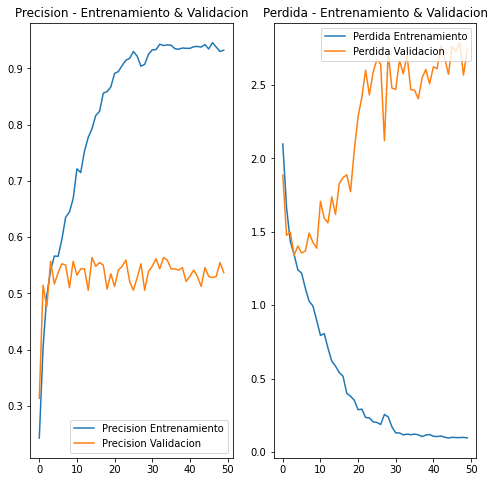

In [24]:
precision = historial.history['accuracy']
precision_val = historial.history['val_accuracy']

perdida = historial.history['loss']
perdida_val = historial.history['val_loss']

rango_epocas = range(EPOCAS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(rango_epocas, precision, label='Precision Entrenamiento')
plt.plot(rango_epocas, precision_val, label='Precision Validacion')
plt.legend(loc='lower right')
plt.title('Precision - Entrenamiento & Validacion')

plt.subplot(1, 2, 2)
plt.plot(rango_epocas, perdida, label='Perdida Entrenamiento')
plt.plot(rango_epocas, perdida_val, label='Perdida Validacion')
plt.legend(loc='upper right')
plt.title('Perdida - Entrenamiento & Validacion')
plt.show()

El modelo sufre de "sobreajuste". Se ajusta muy bien a los ejemplos de entrenamiento pero no puede predecir aquellos ejemplos de validacion que no ha visto antes. El modelo no clasificara imagenes nuevas de manera muy precisa, no poseera capacidad predictiva. Aun asi, el primer paso para poder desarrollar un modelo predictivo es, que al menos, pueda sobreajustarse, indicando que existe un patron discernible en los datos.

# Aumento de datos

LA primera técnica para la prevención de sobreajuste que se usará es el aumento de datos. Este consiste en generar nuevos datos a partir de los datos que tenemos y esto lo podemos hacer mediante el giro horizontal, la rotación y el Zoom. En este caso se utilizará el movimiento horizontal.

In [25]:
aumentacion = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(altura_img,
                                  anchura_img,
                                  3)),
    layers.RandomRotation(0.3),
    layers.RandomZoom(0.3),
  ]
)

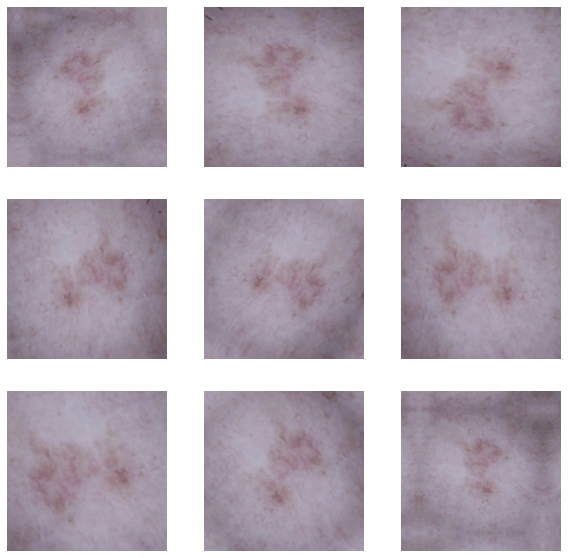

In [26]:
plt.figure(figsize=(10, 10))
for imagenes, _ in datos_entrenamiento.take(1):
  for i in range(9):
    imagen_aumentada = aumentacion(imagenes)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(imagen_aumentada[0].numpy().astype("uint8"))
    plt.axis("off")

# Abandonar de Neuronas

La segunda técnica a utilizar es el abandono consiste en eliminar del modelo neuronas individuales de forma aleatoria para evitar que el modelo aprenda dependencias de forma demasiado intensa dando lugar a sobreajustes. Podemos añadir una capa de abandono tras cada capa de neuronas, el numero del argumento de las capas de abandono (Dropout) es la probabilidad que tiene cada neurona de ser abandonada. Se va a crear una nueva red neuronal con tf.keras.layers.Dropout antes de entrenarla usando las imágenes aumentadas:

In [27]:
modelo = Sequential([
  aumentacion,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  #Abandono de neuronas
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_clases)
])

#Método de regularización


El método de regularización se refiere a agregar un término regular después de la función objetivo o función de costo al optimizar la función objetivo o función de costo Generalmente, hay regularización L1 y regularización L2.

In [28]:
modelo = Sequential([
  aumentacion,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3,kernel_regularizer=l2(1e-5),padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3,kernel_regularizer=l2(1e-5), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, kernel_regularizer=l2(1e-5),padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128,kernel_regularizer=l2(1e-5), activation='relu'),
  layers.Dense(num_clases)
])

Volvemos a compilar el modelo:

In [29]:
modelo.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Entrenamos el nuevo modelo:

In [30]:
EPOCAS = 50
historial = modelo.fit(
  datos_entrenamiento,
  validation_data=datos_validacion,
  epochs=EPOCAS
)

Epoch 1/50
26/26 [==============================] - 4s 105ms/step - loss: 2.1708 - accuracy: 0.2355 - val_loss: 1.9611 - val_accuracy: 0.2931
Epoch 2/50
26/26 [==============================] - 2s 96ms/step - loss: 1.8301 - accuracy: 0.3482 - val_loss: 1.6787 - val_accuracy: 0.4385
Epoch 3/50
26/26 [==============================] - 2s 95ms/step - loss: 1.6247 - accuracy: 0.4330 - val_loss: 1.6978 - val_accuracy: 0.3826
Epoch 4/50
26/26 [==============================] - 2s 95ms/step - loss: 1.5406 - accuracy: 0.4615 - val_loss: 1.6233 - val_accuracy: 0.4631
Epoch 5/50
26/26 [==============================] - 2s 94ms/step - loss: 1.4846 - accuracy: 0.4888 - val_loss: 1.4131 - val_accuracy: 0.5190
Epoch 6/50
26/26 [==============================] - 2s 95ms/step - loss: 1.3860 - accuracy: 0.5134 - val_loss: 1.3882 - val_accuracy: 0.5235
Epoch 7/50
26/26 [==============================] - 2s 95ms/step - loss: 1.3336 - accuracy: 0.5279 - val_loss: 1.3123 - val_accuracy: 0.5459
Epoch 8/50
2

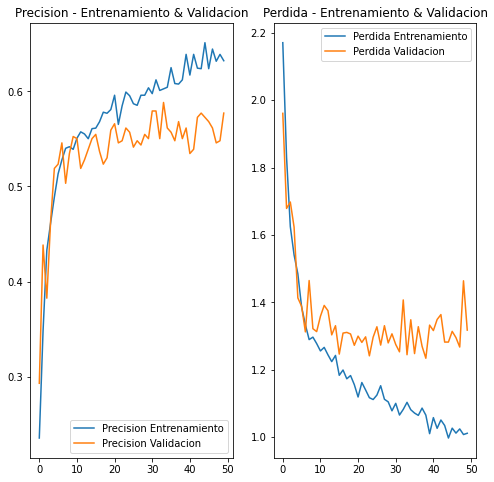

In [31]:
precision = historial.history['accuracy']
precision_val = historial.history['val_accuracy']

perdida = historial.history['loss']
perdida_val = historial.history['val_loss']

rango_epocas = range(EPOCAS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(rango_epocas, precision, label='Precision Entrenamiento')
plt.plot(rango_epocas, precision_val, label='Precision Validacion')
plt.legend(loc='lower right')
plt.title('Precision - Entrenamiento & Validacion')

plt.subplot(1, 2, 2)
plt.plot(rango_epocas, perdida, label='Perdida Entrenamiento')
plt.plot(rango_epocas, perdida_val, label='Perdida Validacion')
plt.legend(loc='upper right')
plt.title('Perdida - Entrenamiento & Validacion')
plt.show()

Finalmente usamos el modelo para predecir una imagen nunca antes vista, en este caso una melanoma:

In [32]:
melanoma_url = "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoHCBYWFRgWFhYYGRgaHBofHBwcGhwaHB4cHB4cHhwcHhgcIS4lHCErHxoaJjgmKy8xNTU1GiQ7QDs0Py40NTEBDAwMEA8QHxISHjQrJCs0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ/P//AABEIALgBEgMBIgACEQEDEQH/xAAbAAADAQEBAQEAAAAAAAAAAAABAgMABAUGB//EADQQAAEDAgQEBAYCAgIDAAAAAAEAAhEhMQMSQVEEYXHwBYGRoRMiscHR4TLxQlIUYgZykv/EABgBAQEBAQEAAAAAAAAAAAAAAAEAAgME/8QAHxEBAQEAAgIDAQEAAAAAAAAAAAERITECQRJhcYFR/9oADAMBAAIRAxEAPwD0RjPgHO7pmdX3TYfFOES93qVhc86IfDBIAn9LxXXu4Vw8V5u91z/kVzDjS273xMfyP5XQ46C32U34YNwCK/mU8qYu3Ee7/N//ANHy1urDEfH83ep9LqLG0pQAe6sygk9Uii7FfbM7mcxSOe6nzPp/2P5TNNuf1TQKz35qHRsLGeR/J3qUxxnf7Ot/sfykY7pCLnBWrERxOJmucu+Y+t10fGdfM4W1KUMmTv8ARZxqNkcw8VT4jo/k71KXF43KBmeR5lJknVDEwA8DM2R9wnapJ7V+Ps91pufypMxC8g53ADmarNwwCeYhUewAURyuFGvcJ+Y+pTnFdEZnT1KlmolzkHu6dHxUGK62Z3qVRj3XzH1Kiwb3Wc6K7q1YONjPiQ5x6ErMx3kVcZ2kpWNgayjlKOezx0DcV+b+TvUp24rtXO9Sg13JZwVBRbiO1JHmVA4r5/k4eZTVEz+0hmFWtSR0NxXf7OPmVjju/wBnepUmupACfkE6LIYYrv8AZ3qUBxBsXO9SlagOcJ5WQ5xHA3d6lFuI+D8zvUqbZuo4fEBziNlbi+OuluI6P5O9Sl+K6Zzu9SsCmDJqVLgf+U/d3qVlP4v/AFWTv2Pj9PKwTrzRaa7JcL2+35WdH2p5Lm37XY5DDeCTSdVDFmIqCnwcOkVG5K0s4WzEAq7ZIg3UW4VdTCLH1UDnEiKfx9FsTFgT9EHP/KYW9lJxv4p2YAg12ELuw8M0M9EBhCc2mg76ovfW/VZk/wBNv+NW2m+6ZwJOlE8CkevosaCicZTynfqrstzlEhBuxunpWnYQBzUHuAPPmqveJqucMqTIqqqGaazunN1mvgVXOMTMS4iFHNdBfSQmYw6pM5AAVGOUzTEeync33gflUKR7RoqqC40URiDNAqVQFKGDNIEd7opijG1UOJJJiPwugNqke3X6ps4UvLYE3MeiOK+LJQIpWUzoNJtcc1el7IBHmkcTMlWxXAdVNgF1WGM3EJSNYBpBN1RhA0V3RAlWLcSbQCiDsxNFQP5UQJlIJRZUyLJGvEmK76LNgGDt5JTiSOnf0Sl2YGpnXvyWK3IuTSZoFZkGq52AkQSKV771VwDNUqrtNK8+woOeQYFwl+IZ3OiGEw5ie9EWqR1NfMykc6gDeSzs1TIg/tJiEMFK/We4SIdmKCctoN++is1wNAJK5mtDiLt5Lpw8OLf2iK4piYmVtb+qXBxA7Tr+EXmOqRjA0Cl+5Vd0TMXjYJHEmSLoAHTsIsBmD6pvKO1tOf0TBgjf6JATMD+07jFkyCkbW6i5sSfZEug0JqqTpCD0lh2qqAG4KXFiyDGR800UXSw0jVI8mwH5Qw3A1T5rlMZ6Jns0XTBhmpstCOI+NKI/SBfC2eQpscHCUWtOltU6sMw15xTklGHUnXdUgqWeXQEVQI+XcqQw3G9YXVlgQswQVWH5EyZTvKdxWe82CZrJFU/UF+yB1poi7lZMWzfyWopEznYeiCb4rVlbF/HzmHhGkmRcrpwmgTrKl8alKk6KzOtrrONbT4eINbDVMXZhTSa/lI4bmBH6WyhskGiUoxtidPuuhmHQ15Lz8XFcHAZflipm3dF0sxg48kSxWU+IdR5KLRmvSxpz791R7/8AEGndVLI7NOuw9vZJjpYQNdVUuiOQsFLh3Utbu6xfJifRTJntJB3NuScUETX7bpQ0achfRFrNTcx7IxKB0Hr2UHY0UCm/EqZXPxHFBoLiRS1akpGO04kDu6mYkmTbU0ncL5HH/wDJquiwmJ3iZjaEvAeMve7LMw2pOhoRPOuiT8X1T+JE8tFfAxw6JBED+l4HDPJdLjyg2OsmPKi9BuKQCaRPRZ2tXxj0MzTPsg7iWtHzUGgXkcf4mxjDBJP3+6+W4nxN74JfpPl3Ra5Z+L7DF8WYw1NfZduBxjHj5TK/NeI4pzydB7zNJhdvg/FvY9rQTWnlRGWH4yv0lp3KUwTHJQwhmgzKs/DPmtMjhkQRCLAeVEWiKCqzHVMW90VA4GyEgGabKhFkmQEzcBSjOmjpI+6LH0lEtm9AmDRYVCUm0Cqz/lqU07BKWkwTRHpCznKL3tiyBOg1+iT4PzBxtFldJTI3ksmyBZODXzRABJNzKqytFFhEUrCvgMnqFiNnaQDvyTktMgTEabqWc175fZc541rSGupJV0sWxgTS0/Vc/CcE5l3E1p9F1mp5Jw0g7osa1RjaEak1J07lFjo56JT/ABN57lQmIjvdQnLreSKan00/azWwZaab7lJMkVE6b6p2MIzEm9vwmAjn1OwF1T4zWySZC58V8AEXC+Y8b8RLc0Hp+f0k5r2/EfFWNZQiSYPTdeJx3GtewgO0MRcWr9V87icUdTzk99yrYbARmzHLAnqZNVueK2Od0ufS9uojfaV6vhXCGc0kV/EmtzzK874gbL9QDEWoKjrZW4bxghgilCTTQGAtYxPLl9KxhFzJ7orfEdBBmdAN184zxyxI+U0G5K9v/kBzA4GpApNY/tYvi3PLXlcXw73uOYmD6CsLhw+HDXnMdDlAp/6xqST9V9DicUHMjWffZeXj8Ef5EwRaaU1PILXjxGby4mYcyNaVrTz89Oa6+HZk/jVxdrFANJ06JsPBgGP5VApSlzzurAANpUmeo/fPmimcPpfAPEgWhlSd7CV75bEVXxfhOI44jflkjyA0hfZsM1WYPKexJ2Ra0CAK7rOoORTNfSd0sle0rMYmA3KdlyhaDm1rZZojRON1JzoSu2eeSJCI5rPOuykzWIN3ulLSTNUXHZRb4o2WS5+iKdXxfND5RA1iy6QABTkpYbZtp3+U7jKw1VHNIBEzuuHiuBD35jQiIMrpcTFD/Xf1TtBJbKLypwDGxQV7171XURWqk2IJn99wgwyKuE09Eo73GoEQplk31RD+Vq+SVz6TcSsmOjDbBoOX7Q+Ie+a58GSZrHPT9roOFIP18lqciocc6GwB5jvmvz/xyc8jvZffYrBliZkL4DxUDO8TUGm/T6pna9PKyFxAMxSfMUXRhcVDQ0WrM6n7AJDiCu/ne3n+1zYstZJ6Aa1n8e4XacuV4dOIQQ0CSCSdaiwp5H3VcPhS4AgSyIHtJPnK4A8mAKBsEnUk/W9l63CPGHLQBNjMkAxUxYmPRV4Eu1LDa5j8xj5TQm3kNT9F7PB47Dk/1LbaugmCToCZ6ALi4theGgCBBkzPX1lcrmHMC0Q2ABJmguT9hzCO2+n0WG9rhIIPzHzPLcTqup4a4AUJv3zXy2FiFz3OnKBEakilyNYrHVOzinyNBLiRsOupv6Iwzye1xL2h0zYigPt+0rXl3Wv8eYi5XEXgguiJtv1+nrzXs+CFheA8RoBvEfr1WbW49PwfgnH5jQRTQnfqvoQIDa0SsZAAWeK0CLwxbq+UAoZZPWywbKeac9FA2UI5UGpX4kCTdSJxPEZYGvc980WkXmUoIcDIRbhgd7om7p46UO59EAJ6LIj0TiF7lNgvWUXGBMJXEAbNUIE81kYWRy0+dw5oNU8mYAup4ZqSL/mqs2Cb2Fd0EjngC9NkcNwodTJ79EgEW19t1Zo1gKQF0QBqf2s1uV5PlHfVSwsRxJLhC6Wv5V0oiLoS2QffoudmIJy6aKoaSBBMflTefm/AVTHUDA5SkkxyNapMk3n9J2xOWRO3vASEHvAeBuvj/HPDvnDhbU/vzX2ePlzTFqLyfFqg6CsJ6L5NnBZhltqLWmpTcfwrI+aSQN4pQj3Pui/DIzE0ME9aQB9Vy4vDkkuM5dJpNBH0WpWfLx9FYwWIMUMxUupHpX1U34UECrqyRu4ivsmAkV7peO7rqwSGGXS4QD9IH1W9Zx6GEwHDcc1RYRcyL8or5Lx8djprMkxNmt6L08Y3rAu7cNgUCk7EkEAXBI5AREHQblUqvjqfAHNmrVoAqJvAPlJNPyuniPDzIg6tnrWR7qGFhTGU3IpMExSTsNfJelwrH0n/ACAy9JieSzaZHm8NhOLiTMZgJtMXA2qAJ0AXv+CMLnjXKTUCQNI6UAXPgeFPdDYIufM0p0H1X13hHhwwmAC+pNyd1m3T07cOgzE0G910YdY0KTNS39qhbUQOqgLTCZ3ILEUoFnuASCklpFbpcfDLrU7/AKVDAqYlAd9EYpQbhZb1SuxB12VXkQpNBBqVfin2zwend0WPHPlzWxoke6DMMTPmo+lDiDVTczNdEYYJWyqRsg2WRyBZQ18vw1Ibrz5qnwwBIOqi97rxWEmEx136aLLbpc+SI9O+qRzCSfmjWAmY8VPfklcCATvadrSpMXmL1GqsJJHkocRmDQAPPZDCxyBBbJOqk6A4zA0mdly42MWOAveSultCdD+kmIwH+VaqMPw3E5p0Gvumw8FpcDWfxyRYBlgQocQ1xgMPn0RUvi1dQUqubEwQbifsruwvly1nfmkGE5hpX8T/AEkx5mL4MxxMqj/BBlIny+y9XDbBqaq+Qisi8pyM2vgfEPByHmhIsNqLkxHFrgDapki5oLbWX6Tj4YN9V5HEeEMccxFa9OVFoa+GwDne75jAJgHXSSvW4DhZc5rYILYzH6DYXXHxXg7w8wDl89V6ng2DiF4ABDW8tLD2VfLgycuU8C9ryYMC34721X0vgnAOc7O8RfT2jovYwsBkSWrq4fayz2reBwsKsx32FUvEDzSulzvuqPDbBLLAT9AjN97JBQo3PfXzsqpQupAn8pYEAlFz8omJS4byRJpOiRAOHJk98laAFNzdaUQwTMk2R0TvfTcoSiPQBKxonuykm7EDaqw33UiK2THfZKo5lnHyQDgL6+6zRrrspJw7/VZUjl7rLOU7Hypxd/VVa+J1Kk+vQW/KVxqY1UXbgNgXrWQleCSOiUEAiDoiDr30QDu32jzWLtgkeZHfNQZmaZcRHJRkd2G8aX1lMwy4tilp+ymx4vy9UuI8kAgGk21PNSUe4NGW0pmO5yJ7hQZg5gXP17/CpFOQPuqFWZMDUIPdUW70Qc4DaVmkCmqUnivcHUE7rpwX7iNvygHxprdZxGtx6I9rscTcpWj/ACOqn8TNEW+q6GMmgslZnZX4INSBXuirhYbBRrYQaQKHS6ttsoCDyFE7JIqIqka6SVUPn7KFLmmmiJdlqi+ylLido3+ilIpgunzPsrRUQp5vIIYL7juEixdhBmoSM/r8qOI7KKJg2YlGqRRr5Nqd+6zxoKIkaW1olDw2R59En8UfMdVJwA6lF5mE+VQ6I9xMfQJ3IE05oB9Epg2am62W6zzEIsxApFrust8QbFZSfHZzYi9O9l0YQimq5W3rQKxqIsbzyWSqMWTcUCOaa81AMaCMut1Vrax9FI4eajTQpiwECb6lSc8VFf2hhYkyJqouh85aEUv56J8OwnuUoaAK3hLgAEUM1rqip0sFeQ7Clg1c4OMNuEznGwTEkfKISRLZiN9dkzWS6unPvkmxBbS3r+0CTmECBrukac8gkxCDQ1CuAPYypBk/M3uiFKRlZ5HuF1Bhma2gBTYyK3P4VXOip2VitKRffdZmJIiIP2WIoCVVjdSomcPRZrqSgafZEWiEsqF0wfRKbiewlccsp7jaYUugAzV9E9BrdYO0FqIyJkxRWDQxHGKCTRM0WJupOfMj3WYSK6yg5w6DzXM8/tVzUoapQytfJNU4DCdFdforME9N1F9NFZhpVSqWPjtaqMdNYgKbmA6XTWr6BM0cYLgBdF40CVzwSmna5Ug+GstlCyMX9fHtd8oJv9FVoiZ2XO00jspxJcK0hOJbBjbr1RYBJhA0gEXWe6+gRhZwpm9fJBnLvsItBJgW1lZ+HMxRR1fKCaVhW4cwSPP8riwRA2hdTZppz5KTpFZ0CGLAMbpHtIpPeiTFJIAGgmUKRR94HvuNU7Wkzvv90MJktBNDr91V78tYJCkVoMQTJKLRGvKEzDWTeKclnQDJrFlI7XbVhNM6WSM6dVVwgQLqBQ0nyFls03PYTMaBzK2QHrCsOsAaVMyq5CKTP1QiAIv9liITg0X3k1226wmZa6FhusDSuqkAdNjZFjkroAgLNGgCkYEW80jwYiURyuiZtNd0dkjHAGhJ5ldDH0khcrWAmpklVe2BUpioh4OqDjPRO3DHksSBTRQ2GYddAhQmqBEJHVWlFBREtSkwnbiUqIUK3w+ay1Oayk+MYKE9wr4cGSsshemdMitlXDk2WWSk8NsE3k+i6CKSaILIqMcMAAjzWY+ZGiKyqYL8XLW/1QD8wzD++ysss+2lmOgQdFVryW1toFllKiH6WlMTBossqBQmOs1TF402WWSC1mQdfbZbEgEGfPksspqdqNxA4UStmpudAispDh/x+aio5wEckFlCiBrutl2/pBZQEuNh5lBgJMRTnf1WWUihlZBv9lUP12RWShY/U+SzjUSsspGfTVTeEVlVRmsF/VMQssqCjlHNZZZSf//Z"
melanoma_path = tf.keras.utils.get_file('melanoma_ejemplo', origin=melanoma_url)

img = tf.keras.utils.load_img(
    melanoma_path, target_size=(altura_img, anchura_img)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

prediccion = modelo.predict(img_array)
puntuacion = tf.nn.softmax(prediccion[0])

resultado = 100 * np.max(puntuacion)

if resultado > 40:
  print(
    "Esta imagen es de un {} con una confianza del {:.2f} por ciento."
    .format(nombre_clases[np.argmax(puntuacion)], resultado)
  )
else: 
  print("Esta imagen no se puede clasificar.")
      
  

Esta imagen es de un melanoma con una confianza del 42.31 por ciento.
